### DescriptionHere

we are implementing section 6.9.1 dicsussion from the text book "Machine LEarning", by Tom Mitchell <br>
The example is Navie Bayes Classfier on the play tennis dataset. 

In [1]:
import pandas as pd

In [2]:
#Load Dataset
df = pd.read_csv('PlayTennis_NB_Example.csv')

# Display the first 5 rows of the dataset
print(df.head())

  Day   Outlook Temperature Humidity    Wind PlayTennis
0  D1     Sunny         Hot     High    Weak         No
1  D2     Sunny         Hot     High  Strong         No
2  D3  Overcast         Hot     High    Weak        Yes
3  D4      Rain        Mild     High    Weak        Yes
4  D5      Rain        Cool   Normal    Weak        Yes


In [3]:
# Test Case is classsify the follwoing instance <Outlook = Sunny, Temperture = Cool, Humidity = High, Wind = Strong>
test_case = {'Outlook': 'Sunny', 'Temperature': 'Cool', 'Humidity': 'High', 'Wind': 'Strong'}

# Calculate the prior probabilities for each class label
prior_probabilities = df['PlayTennis'].value_counts(normalize=True).to_dict()

# Round the prior probabilities to 2 decimal places
prior_probabilities = {k: round(v, 2) for k, v in prior_probabilities.items()}
print("Rounded Prior Probabilities: ", prior_probabilities)

Rounded Prior Probabilities:  {'Yes': 0.64, 'No': 0.36}


In [4]:
# Compute the likelihood probabilities for each feature given the class label
likelihood_probabilities = {}   

# Exclude the target variable and the Day columen from the features
for feature in df.columns[1:-1]: 
    likelihood_probabilities[feature] = {}
    for class_label in df['PlayTennis'].unique():
        # Calculate the likelihood probability for each feature given the class label
        likelihood_probabilities[feature][class_label] = df[df['PlayTennis'] == class_label][feature].value_counts(normalize=True).to_dict()
        # Round the likelihood probabilities to 2 decimal places
        likelihood_probabilities[feature][class_label] = {k: round(v, 2) for k, v in likelihood_probabilities[feature][class_label].items()}
        print(f"Likelihood Probabilities for {feature} given {class_label}: ", likelihood_probabilities[feature][class_label])


Likelihood Probabilities for Outlook given No:  {'Sunny': 0.6, 'Rain': 0.4}
Likelihood Probabilities for Outlook given Yes:  {'Overcast': 0.44, 'Rain': 0.33, 'Sunny': 0.22}
Likelihood Probabilities for Temperature given No:  {'Hot': 0.4, 'Mild': 0.4, 'Cool': 0.2}
Likelihood Probabilities for Temperature given Yes:  {'Mild': 0.44, 'Cool': 0.33, 'Hot': 0.22}
Likelihood Probabilities for Humidity given No:  {'High': 0.8, 'Normal': 0.2}
Likelihood Probabilities for Humidity given Yes:  {'Normal': 0.67, 'High': 0.33}
Likelihood Probabilities for Wind given No:  {'Strong': 0.6, 'Weak': 0.4}
Likelihood Probabilities for Wind given Yes:  {'Weak': 0.67, 'Strong': 0.33}


In [5]:
# Navie Bayes Probability  for playTennis = Yes
prob_yes = prior_probabilities['Yes']
for feature, value in test_case.items():
    prob_yes *= likelihood_probabilities[feature]['Yes'].get(value, 0)

#print the probability of PlayTennis = Yes with two decimal places

print("Probability of PlayTennis = Yes: ", round(prob_yes,4))

Probability of PlayTennis = Yes:  0.0051


In [6]:
# Navie Bayes Probability  for playTennis = No
prob_no = prior_probabilities['No']
for feature, value in test_case.items():
    prob_no *= likelihood_probabilities[feature]['No'].get(value, 0)

#print the probability of PlayTennis = Yes with two decimal places

print("Probability of PlayTennis = No: ", round(prob_no,4))

Probability of PlayTennis = No:  0.0207


In [7]:
# The end result of NB is to compare the two probabilities and choose the one with the highest value.
if prob_yes > prob_no:
    print("The predicted class is: PlayTennis = Yes")
else:   
    print("The predicted class is: PlayTennis = No")

The predicted class is: PlayTennis = No


In [8]:
# Lets implement the same code using sklearn library
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import LabelEncoder
import numpy as np

# Load the dataset
df = pd.read_csv('PlayTennis_NB_Example.csv')
df = df.drop(columns=['Day']) # Drop the 'Day' column as it is not needed for classification

# Encode categorical features using LabelEncoder
label_encoders = {}
for column in df.columns:
    if df[column].dtype == 'object':
        le = LabelEncoder()
        df[column] = le.fit_transform(df[column])
        label_encoders[column] = le
        # Display the mapping for the column without showing int64()
        mapping = {original: int(encoded) for original, encoded in zip(le.classes_, le.transform(le.classes_))}
        print(f"Label Encoding for {column}: {mapping}")

    

# Split the dataset into features and target variable
X = df.drop(columns=['PlayTennis'])
y = df['PlayTennis']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train the Gaussian Naive Bayes model
gnb = GaussianNB()
gnb.fit(X_train, y_train)

# Make predictions on the test set
y_pred = gnb.predict(X_test)

# Calculate accuracy and print classification report
accuracy = accuracy_score(y_test, y_pred)   
print("Accuracy in %: ", round(accuracy,2)*100)

Label Encoding for Outlook: {'Overcast': 0, 'Rain': 1, 'Sunny': 2}
Label Encoding for Temperature: {'Cool': 0, 'Hot': 1, 'Mild': 2}
Label Encoding for Humidity: {'High': 0, 'Normal': 1}
Label Encoding for Wind: {'Strong': 0, 'Weak': 1}
Label Encoding for PlayTennis: {'No': 0, 'Yes': 1}
Accuracy in %:  100.0


In [9]:
# Encode the test case with feature names
test_case_encoded = pd.DataFrame({
    'Outlook': label_encoders['Outlook'].transform([test_case['Outlook']])[0],
    'Temperature': label_encoders['Temperature'].transform([test_case['Temperature']])[0],
    'Humidity': label_encoders['Humidity'].transform([test_case['Humidity']])[0],
    'Wind': label_encoders['Wind'].transform([test_case['Wind']])[0]
}, index=[0])  # Create a DataFrame with feature names as columns

In [10]:
# Display the encoded test case with feature names
print("Encoded Test Case with Feature Names:")
print(test_case_encoded)

Encoded Test Case with Feature Names:
   Outlook  Temperature  Humidity  Wind
0        2            0         0     0


In [11]:

# display after inverse the encoding
decoded_test_case = test_case_encoded.copy()
for column in decoded_test_case.columns:
    decoded_test_case[column] = label_encoders[column].inverse_transform(decoded_test_case[column])
print("Given Test Case:")
print(decoded_test_case)

Given Test Case:
  Outlook Temperature Humidity    Wind
0   Sunny        Cool     High  Strong


In [12]:

# Make prediction for the test case
predicted_class = gnb.predict(test_case_encoded)[0]
predicted_class_label = label_encoders['PlayTennis'].inverse_transform([predicted_class])[0]
print("Predicted class for the test case:", predicted_class_label)

Predicted class for the test case: No


## Activity to do
Repeat above for the example below, taken from textbook Machine Learning, Dr Sridar and Dr Vijayalakshmi

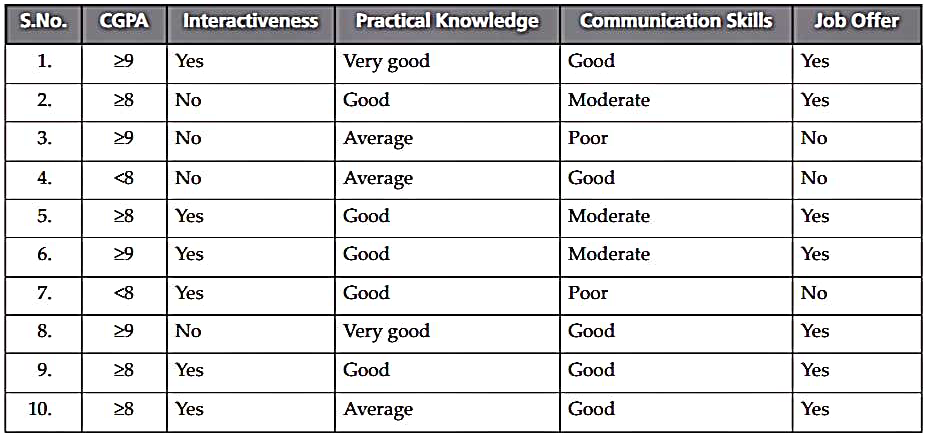


### Zero Probability Error

Repeat the exercise <br>
<CGPA = 8; Interactiveness = Yes; Practical Knowledge = Average; Communication Skills = Good>. Read Zero probability Error Page 241 from the textbook. Machine Learning, Dr Sridar and Dr Vijayalakshmi